<a href="https://colab.research.google.com/github/glauciodrumond/Data_Analysis/blob/master/%5BPROJECT%5D_Cardiovascular_Diseases.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project - Cardiovascular Diseases

Cardiovascular diseases (CVDs) is a class of diseases or disorders of the heart and blood vessels. There are a lot of diseases included in this class as congenital heart disease, rheumatic heart disease,peripheral arterial disease and others.

<p><img alt="Colaboratory logo" height="" src="https://img.medscape.com/thumbnail_library/is_191223_heart_disease1_800x450.jpg"   vspace="0px"></p>


Despite being one of the main causes of death worldwide, it is estimated that about 90% of cardiovascular diseases could be prevented by adopting some measures and changes in lifestyle.

In these days, there are several researches in the Machine Learning area aiming at the construction of predictive models that can help doctors discover cardiovascular diseases in their patients.

Studies published in the magazine Nature Biomedical Engineering Machine, shows that Deep Learning algorithms were able to anticipate cardiovascular diseases up to 5 years.
Definitely, the use of Artificial Intelligence has deeply impacted the health area, and has provided, to professionals doctors, increasingly accurate intelligence inputs.



## GETTING THE DATA

The main data set used in this project was collect from  ***Cleveland Clinic Foundation*** and is available in the well known [Repository UCI *Machine Learning*](https://archive.ics.uci.edu/ml/datasets/heart+Disease).It is noteworthy that the names, identity and personal documents of the patients were completely removed from the database.

The processed *dataset* contains data from 303 people and has 76 attributes. However, the main articles and published studies chose to use only 14 attributes, considered of greater relevance. The same way, this *Data Science* project will use these same 14 main variables.

<p><img alt="Colaboratory logo" height="100" src="https://www.netclipart.com/pp/m/181-1814526_heartburn-human-coronary-heart-disease.png" align="right" hspace="20px" vspace="0px"></p>

* The`csv` file with the data of 303 people and 14 attributes can be downloaded in [this link](https://raw.githubusercontent.com/carlosfab/curso_data_science_na_pratica/master/modulo_03/heart-disease-uci.csv).

* The file containing all the details and documentation of the dataset used in this project can be found in [this link](https://github.com/carlosfab/curso_data_science_na_pratica/blob/master/modulo_03/heart-disease.names).

* There is also a secondary *dataset* that will be used to see the evolution in the number of deaths from cardiovascular diseases in Brazil (between the years 2004-2017). These data were made available by the [Brazilian Society of Cardiology](http://www.cardiometro.com.br/anteriores.asp), and can be downloaded in [this link](https://raw.githubusercontent.com/carlosfab/curso_data_science_na_pratica/master/modulo_03/mortes_doencas_cardiovasculares.csv).

### Attribute information:

* `age` - in years
* `sex` - patient gender
  * 0: woman
  * 1: men
* `cp` - type of chest pain
  * 1: typical angina
  * 2: atypical angina
  * 3: non-cardiac pain
  * 4: asymptomatic
* `trestbps` - resting blood pressure
* `chol` - serum cholesterol (*mg/dl*)
* `fbs` - fasting blood sugar > 120*mg/dl*
  * 0: `False`
  * 1: `True`
* `restecg` - result of resting electrocardiography
  * 0: normal
  * 1: abnormalities of ST-T  (inversion of the T wave and elevation or depression > 0.05*mV*)
  * 2: ventricular Hypertrophy probable left or definitive (by the Romhilt-Estes criteria)
* `thalach` - maximum heart rate reached
* `exang` - exercise-induced angina
  * 0: no
  * 1: yes
* `oldpeak` - exercise-induced ST segment depiction in relation to rest
* `slope` - ST segment slope at peak exercise
* `ca` - number of main vessels colored by fluoroscopy
* `thal` - *thallium stress test*
  * 3: normal
  * 6: fixed defect
  * 7: reversible defect
* `num` - diagnosis of heart disease (angiographic diagnosis)
  * 0: no heart disease ( < 50% diameter narrowing)
  * 1,2,3,4: there is heart disease ( > 50% diameter narrowing)



###Import the Data

In an initial step, we will import the two *datasets* mentioned at the beginning of the notebook:

*  One containing data related to cardiovascular diseases (303 people and 14 attributes); and
*  One containing data on mortality in Brazil due to cardiovascular diseases.


In [0]:
# importing the necessary libraries
# importar as bibliotecas necessárias
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns
sns.set()

# datasets url
# url dos datasets
dataset_uci = "https://raw.githubusercontent.com/carlosfab/curso_data_science_na_pratica/master/modulo_03/heart-disease-uci.csv"
dataset_brasil = "https://raw.githubusercontent.com/carlosfab/curso_data_science_na_pratica/master/modulo_03/mortes_doencas_cardiovasculares.csv"

# importing UCI's dataset
# importar dataset da UCI
df = pd.read_csv(dataset_uci)

# importing indice's dataset from Brazil
# importar dataset dos indíces do Brasil
df_brasil = pd.read_csv(dataset_brasil)

Looking above the information about the attributes, we realize that our target variable  (`num`)  has five possible values: \[0, 1, 2, 3, 4\].

However, following most of the researches that used this dataset, we will consider only two possible situations:

*  0 - no heart disease
*  1 - there is heart disease

Then, we will match the values ​​between 1-4 to 1.


In [2]:
# target variable before
# variável alvo antes
df.num.value_counts()

0    164
1     55
2     36
3     35
4     13
Name: num, dtype: int64

In [0]:
# convert values> = 1 to 1
# converter valores >= 1 em 1
df.loc[df.num != 0, 'num'] = 1

In [4]:
# target variable after
# variável alvo depois
df.num.value_counts()

0    164
1    139
Name: num, dtype: int64

# EXPLORATORY DATA ANALYSIS

To understand our dataset,  I will do an exploratory analysis to discover any patterns, to find anomalies, to create and check hypothesis using chart representations and summary statistics. Doing this we can clean our dataset and use the data wisely.


## Dataframe Shape
*First let's check the number rows and columns our dataframe has using the `shape` attribute of pandas.Dataframe*

In [5]:
# Shows rows and columns
# Mostras linhas e colunas
print ('Rows: ' , df.shape[0]) 
print ('Columns: ' , df.shape[1])


Rows:  303
Columns:  14


## Variables distribution
Using the  `head()` method, that shows the first 5 entries of our dataframe by default, and `tail()`method, that shows the last 5 entries of our dataframe by default, it is possible to check how the variables are distribute and confirm if we really have 303 rows and 14 columns.

It is possible to pass a custom number, to show more or less entries, and that's what we will do here passing the number 3.


In [6]:
# First 3 entries
# 3 primeiras entradas
df.head(3)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,1
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1


In [7]:
# Last 3 entries
# Ultimas 3 entradas
df.tail(3)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
300,57.0,1.0,4.0,130.0,131.0,0.0,0.0,115.0,1.0,1.2,2.0,1.0,7.0,1
301,57.0,0.0,2.0,130.0,236.0,0.0,2.0,174.0,0.0,0.0,2.0,1.0,3.0,1
302,38.0,1.0,3.0,138.0,175.0,0.0,0.0,173.0,0.0,0.0,1.0,0.0,3.0,0


## Variables type
Now that we can see a small sample of our dataframe, we will check the variables types, using `dtypes` method, doing this we will be aware of the functions that can be performed in each variable.

In [8]:
# Variables types
# Tipos de Variaveis
df.dtypes

age         float64
sex         float64
cp          float64
trestbps    float64
chol        float64
fbs         float64
restecg     float64
thalach     float64
exang       float64
oldpeak     float64
slope       float64
ca          float64
thal        float64
num           int64
dtype: object

## Summary statistics
Applying the `describe()` method we can see our first statistics summary from all numerical columns. 
As you can see below  some basic statistical details like max, min ,mean, std etc.


In [9]:
# Shows summary statistics
# Mostra estatísticas resumidas
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.438944,0.679868,3.158416,131.689769,246.693069,0.148515,0.990099,149.607261,0.326733,1.039604,1.600660,0.663366,4.722772,0.458746
std,9.038662,0.467299,0.960126,17.599748,51.776918,0.356198,0.994971,22.875003,0.469794,1.161075,0.616226,0.934375,1.938383,0.499120
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
25%,48.000000,0.000000,3.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
50%,56.000000,1.000000,3.000000,130.000000,241.000000,0.000000,1.000000,153.000000,0.000000,0.800000,2.000000,0.000000,3.000000,0.000000
75%,61.000000,1.000000,4.000000,140.000000,275.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,1.000000,7.000000,1.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,3.000000,7.000000,1.000000


## Is there any null value in our dataframe? If so How many?

Using the pandas method `.isnull()` with `sum()` we answered those questions, observing that there's no null value in our dataframe.

In [10]:
# Look for null values and sum it
# Procura valores nulos e soma quantos sao 
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
num         0
dtype: int64

##How many values ​​has no heart disease and how many has heart disease  in the dataset?
Using pandas method `value_counts()` that shows the values in a column with the number of occurrences, we can see that:


*   164 has no heart disease
*   139 has heart disease



In [11]:
# Count value in column with number occurrences
# Contar valores na coluna
df.num.value_counts(0)

0    164
1    139
Name: num, dtype: int64

## How many deaths from heart disease happen in brazil?

Using of second dataframe (df_brasil), I've made a line chart and now we can check how many deaths was caused by heart diseases in Brazil, see if it's incresing or decresing and do other analysis. 
Let's get to it! 

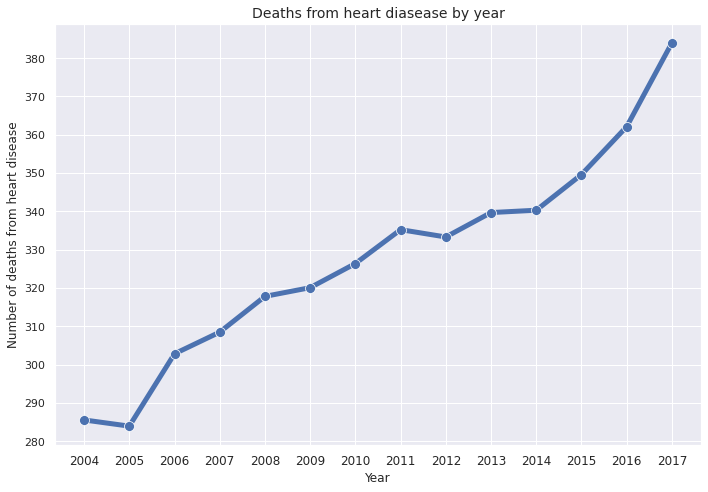

In [12]:
# Line  chart using seaborn to show deaths from heart disease in df_brasil
# grafico de linhas para mostrar mortes por doenças cardíacas do df_brasil

fig, ax = plt.subplots(figsize=(10,7))
ax = sns.lineplot ( x= 'ano' , y = 'mortes_doencas_cardio', data = df_brasil,
                    markers = True , dashes = False, linestyle='-', marker='o',
                   linewidth=5, markersize =10)

ax.set_title ('Deaths from heart diasease by year', fontsize = 14)
ax.set_xlabel('Year')
ax.set_ylabel('Number of deaths from heart disease')
ax.tick_params(axis='x',labelsize = 12, )
ax.xaxis.set_major_locator(ticker.MultipleLocator(1))
ax.yaxis.set_major_locator(ticker.MultipleLocator(10))

plt.tight_layout()


Overall the heart disease in Brazil has been increasing every year speciali in the last 3 years shown in our data.

## How many men and women there is in the dataset? 

As you can see in our bar chart, 206 entries, from our dataset, are men and this represents almost 68% of the entries while 97 entries are women which represents about 32%. 


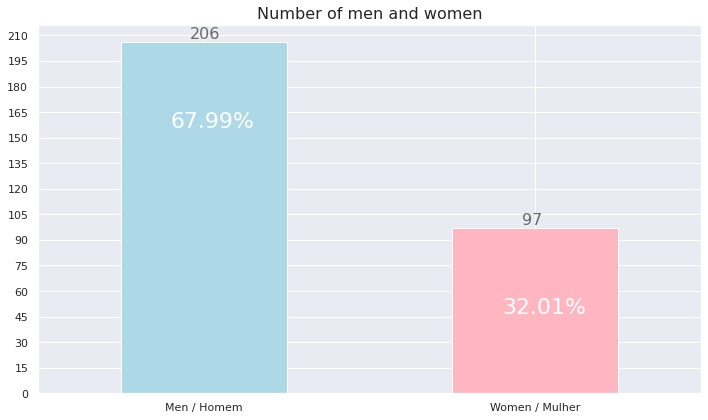

In [13]:
# plot bar chart showing number men and women
# gera grafico de barra mostrando numero de homens e mulheres

colors = ['lightblue', 'lightpink']
fig, ax = plt.subplots(figsize=(10,6))
name = ["Men / Homem" , "Women / Mulher"]
ax = df.sex.value_counts().plot(kind = 'bar', color = colors)
ax.set_title("Number of men and women", fontsize = 16)
ax.set_xticklabels (name, rotation = 0)
ax.yaxis.set_major_locator(ticker.MultipleLocator(15))

# find the values and append to list to create percent
# acha os valores e adiciona a lista para calcular porcentagem
for i in ax.patches:
    # get_x pulls left or right; get_height pushes up or down
    # get_x puxa esquerda ou direita ; get_height empurra pra cima ou pra baixo
    ax.text(i.get_x()+.21, i.get_height()+2, \
            str(round((i.get_height()), 2)), fontsize=16, color='dimgrey',
                rotation=0)

# create a list to collect the plt.patches data
# cria uma list para guardar a data do plt.patches 
totals = []

# find the values and append to list
# acha os valores e adiciona a lista
for i in ax.patches:
    totals.append(i.get_height())

total = sum(totals)

# set individual (percent) bar lables using above list
# coloca rotulos (porcentagem) individuais nas barras usando a lista acima
for i in ax.patches:
    # get_x pulls left or right; get_height pushes up or down
    # get_x puxa esquerda ou direita ; get_height empurra pra cima ou pra baixo
    ax.text(i.get_x()+.15, i.get_height()-50, \
            str(round((i.get_height()/total)*100, 2))+'%', fontsize=22,
                color='white')

plt.tight_layout()

## Is there a relationship between patients' age and cholesterol?

Together with scatterplot chart, that shows a relationship between our two variables, I decide to plot our regression line, which is a simple line that shows the best fit for our data based in our choosed variables.

According to an article from [Medical News Today](https://www.medicalnewstoday.com/articles/321519#normal-ranges): "doctors once determined whether a person’s serum cholesterol level was healthy by comparing it to established normal ranges."

Now before deciding whether a person's cholesterol is not healthy, doctors consider several factors like obesity,high blood pressure, smoking or tobacco use, family history and others.

For our dataset the range for healthy cholesterol is between 125mg/dl to 200mg/dl.

That being said we can see in our chart that the inclination the most people has cholesterol above 200mg/dl and the regression line has a slight slope which means that when a person gets older there is a tendency to increase cholesterol.

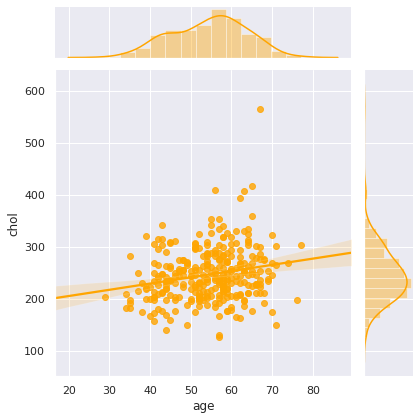

In [14]:
# Dispersion chart for variables age and chol
# Grafico dispersao para variaveis age e chol

ax = sns.jointplot('age', 'chol' , data=df, kind="reg",
                   truncate=False, color="orange", height = 6)


plt.tight_layout()

## What is the frequency for serum cholesterol?

Having a look at our chart we can confirm what the scatter plot shows, that our frequency for the variable is higher between 200mg/dl and 300mg/dl.


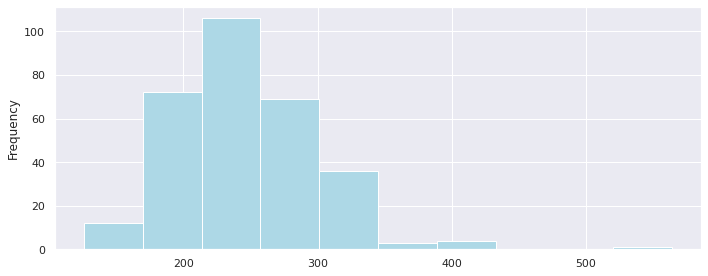

In [15]:
fig, ax = plt.subplots(figsize=(10,4))
ax = df.chol.plot.hist (bins =10 , color = 'lightblue')
plt.tight_layout()

## Result of Resting Electrocardiography

As we can see in our donut chart, almost 50% of our entries from the dataset has had normal results from resting electrocardiography, 1,3% has ST-T Abnormalities and the rest 48,8% has Ventricular Hypertrophy probable left or definitive(by the Romhilt-Estes criteria).





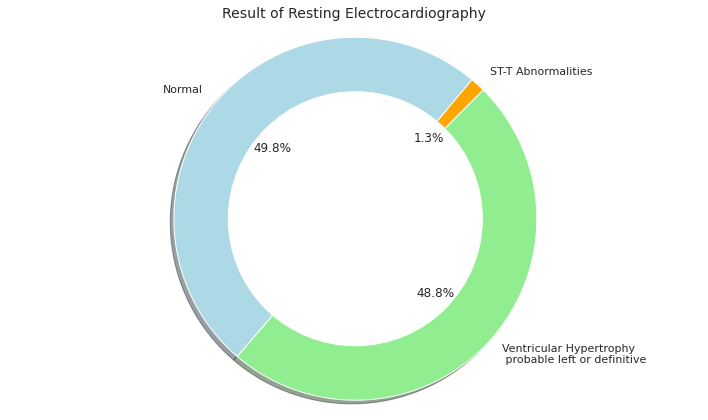

<Figure size 432x288 with 0 Axes>

In [16]:
# Donut chart
# Donut grafico
colors = ['lightblue' , 'lightgreen' , 'orange']
labels = ['Normal' , 'Ventricular Hypertrophy\n probable left or definitive ', 'ST-T Abnormalities']
explode = (0.01,0.01,0.00)
fig1 , ax1 = plt.subplots(figsize = (10,6))
ax1.pie( df.restecg.value_counts(), colors = colors, labels=labels,
        autopct='%1.1f%%', startangle=50, 
        shadow = True)
ax1.set_title ('Result of Resting Electrocardiography', fontsize = 14)
#draw circle
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
# Equal aspect ratio ensures that pie is drawn as a circle
ax1.axis('equal')  
plt.tight_layout()
plt.show()
plt.tight_layout()

## Variables correlation

This method is a great way to see how the variables is correlated. The bigger the number the higher is the correlation. 

In the chart `slope`( ST segment slope at peak exercise) and `oldpeak`(exercise-induced ST segment depiction in relation to rest) is the variables with higher correlation, 0.58, followed by `thal`(thallium stress test) and `num`(diagnosis of heart disease) with 0.52.



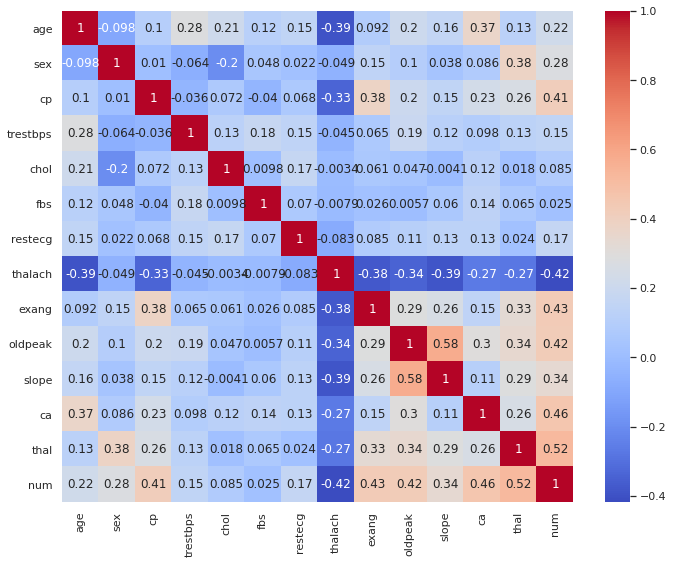

In [17]:
# plot correlation chart
# plotar um gafico de correlacao
fig, ax = plt.subplots(figsize=(10,8))
ax = sns.heatmap(df.corr() , fmt= '.2g', cmap='coolwarm',annot= True )
plt.tight_layout()

## Any outliers?

Outliers are values that are much bigger or smaller than the rest of the data.
In order to be an outlier, the data value must be:

*   larger than Q3 by at least 1.5 times the interquartile range (IQR), or
*   smaller than Q1 by at least 1.5 times the IQR.

<p><img alt="Colaboratory logo" height="330" src="https://miro.medium.com/max/9000/1*2c21SkzJMf3frPXPAR_gZA.png"   vspace="0px"></p>




Remembering the variables meaning:

* `chol` - serum cholesterol level in mg/dl
* `thalach` - maximum heart rate reached
* `trestbps` - resting blood pressure

As we can see we have some outliers in these variables.

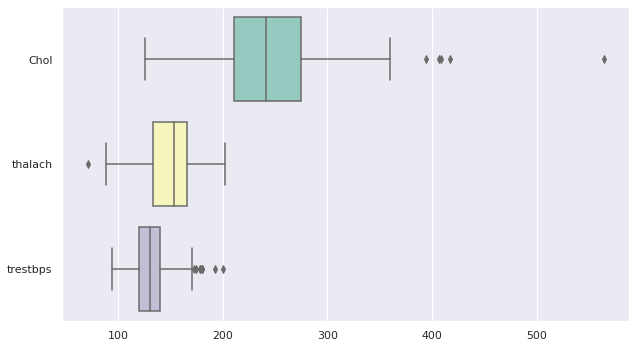

In [18]:
fig, ax = plt.subplots(figsize=(9,5))
name = ['Chol','thalach', 'trestbps']
ax = sns.boxplot(data = (df.chol, df.thalach,df.trestbps), orient='h',
                 palette = "Set3")
ax.set_yticklabels(name)
plt.tight_layout()

#Conclusion

This is the first part of this project these are a few examples of data exploratory analysis that we can do when starting a data science project. 

Next part of these project is create a machine learning algorithm, based on predictive models, that can help discover cardiovascular diseases in patients.